<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/Missing_eGFR%26slope_ipynb(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/WideTable(ยังไม่ตัด).xlsx')

In [ ]:
df.head()

,Unnamed: 0,PatientUID,Recent_Creatinine,Recent_eGFR,Recent_Date,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,...,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),LabLocation,LabCwhen
0,0,924852,2.63,15.8,2560-08-07 12:32:50.527,3349148,2.754717,0,30,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-01 08:15:57.943
1,1,989278,2.03,32.3,2560-08-11 08:22:48.737,3348711,-46.720000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-01 09:14:12.527
2,2,2103792,1.05,55.9,2560-08-14 14:38:44.150,3369057,11.018868,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-08 09:42:53.923
3,3,953611,1.03,51.1,2560-08-15 02:05:01.323,3366405,17.222520,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-06 10:35:19.840
4,4,488150,1.94,32.6,2560-08-15 09:18:43.240,3356167,-79.002653,0,0,0,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-03 08:44:33.377


In [ ]:
df.shape #ข้อมูลทั้งหมดมี 94 columns , 52620 rows

(52620, 94)

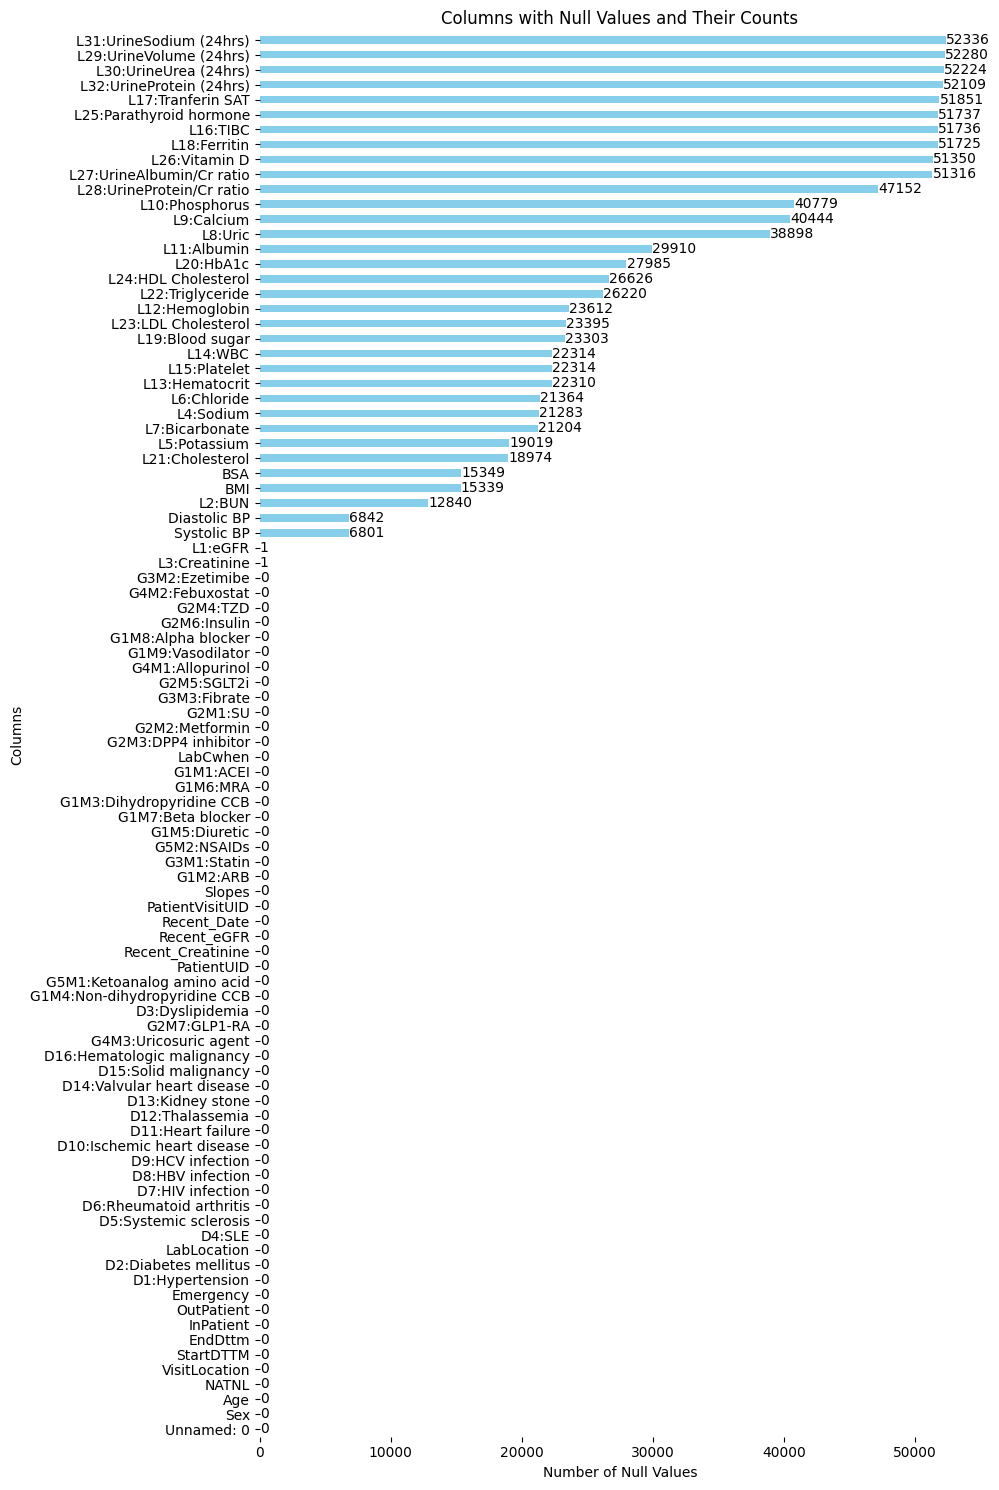

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

null_df = df.isnull()
null_count = null_df.sum()
null_count_sorted = null_count.sort_values()
plt.figure(figsize=(10, 15))  # Adjust the figsize to control the plot size
ax = null_count_sorted.plot(kind='barh', color='skyblue', edgecolor='none')  # Use 'barh' for horizontal bars
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('Columns with Null Values and Their Counts')
plt.xlabel('Number of Null Values')
plt.ylabel('Columns')
plt.tight_layout()
label_distance = 10
for i, v in enumerate(null_count_sorted):
    ax.text(v + label_distance, i, str(v), color='black', va='center')

plt.show()

In [ ]:
# สร้างตัวแปรมาเก็บค่า Missing โดยรวม "PatientUID", "Slopes", "Recent_eGFR" เป็นคอลัมน์ที่ไม่มี Missing
missing_columns = df.columns[(df.isnull().any()) | (df.columns.isin([ "PatientUID", "Slopes", "Recent_eGFR"]))].tolist()
# สร้าง DataFrame ที่มีเฉพาะคอลัมน์ที่มีค่าที่หายไป
stage = df[missing_columns]
stage.head() #36 คอลัมน์ที่มีค่าว่าง

,PatientUID,Recent_eGFR,Slopes,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,L3:Creatinine,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
0,924852,15.8,2.754717,NaN,NaN,53.0,131.0,13.0,NaN,3.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,989278,32.3,-46.720000,18.71,1.70,71.0,121.0,80.3,5.2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2103792,55.9,11.018868,23.56,1.47,93.0,143.0,44.7,22.6,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,953611,51.1,17.222520,27.50,1.41,60.0,120.0,33.5,28.9,1.5,...,147.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,488150,32.6,-79.002653,NaN,NaN,NaN,NaN,114.2,NaN,0.7,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN


#แบ่งระยะตาม eGFR

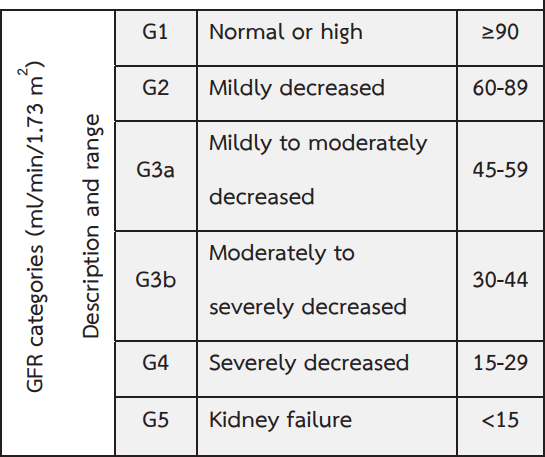

In [ ]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตามระดับ 'Recent_eGFR'
def categorize_eGFR(eGFR_value):
    if eGFR_value >= 90:
        return 'Stage 1'
    elif 89.99 >= eGFR_value >= 60:
        return 'Stage 2'
    elif 59.99 >= eGFR_value >= 45:
        return 'Stage 3a'
    elif 44.99 >= eGFR_value >= 30:
        return 'Stage 3b'
    elif 29.99 >= eGFR_value >= 15:
        return 'Stage 4'
    else:
        return 'Stage 5'

# เพิ่มคอลัมน์ 'eGFR_Category' ที่บอกระดับของ 'Recent_eGFR'
stage['eGFR_Category'] = stage['Recent_eGFR'].apply(categorize_eGFR)
stage.head()

<ipython-input-5-d27e3363694d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage['eGFR_Category'] = stage['Recent_eGFR'].apply(categorize_eGFR)


,PatientUID,Recent_eGFR,Slopes,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,L3:Creatinine,...,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),eGFR_Category
0,924852,15.8,2.754717,NaN,NaN,53.0,131.0,13.0,NaN,3.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stage 4
1,989278,32.3,-46.720000,18.71,1.70,71.0,121.0,80.3,5.2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stage 3b
2,2103792,55.9,11.018868,23.56,1.47,93.0,143.0,44.7,22.6,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stage 3a
3,953611,51.1,17.222520,27.50,1.41,60.0,120.0,33.5,28.9,1.5,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stage 3a
4,488150,32.6,-79.002653,NaN,NaN,NaN,NaN,114.2,NaN,0.7,...,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,Stage 3b


In [ ]:
#เรียงให้คอลัมน์  'Unnamed: 0', 'PatientUID', 'Slopes', 'eGFR_Category' มาอยู่ด้านหน้า
column_order = ['PatientUID', 'Slopes', 'Recent_eGFR','eGFR_Category'] + [col for col in stage.columns if col not in ['PatientUID', 'Slopes', 'Recent_eGFR', 'eGFR_Category']]
stage = stage[column_order]
stage.head()

,PatientUID,Slopes,Recent_eGFR,eGFR_Category,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
0,924852,2.754717,15.8,Stage 4,NaN,NaN,53.0,131.0,13.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,989278,-46.720000,32.3,Stage 3b,18.71,1.70,71.0,121.0,80.3,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2103792,11.018868,55.9,Stage 3a,23.56,1.47,93.0,143.0,44.7,22.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,953611,17.222520,51.1,Stage 3a,27.50,1.41,60.0,120.0,33.5,28.9,...,147.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,488150,-79.002653,32.6,Stage 3b,NaN,NaN,NaN,NaN,114.2,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN


In [ ]:
#จากมากไปน้อย
stage_sort = stage.sort_values(by='Recent_eGFR', ascending=False)
stage_sort.head()

,PatientUID,Slopes,Recent_eGFR,eGFR_Category,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
51783,553538,0.058871,140.75,Stage 1,18.88,1.20,68.0,108.0,142.68,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51784,553538,-51.636256,140.75,Stage 1,NaN,NaN,67.0,103.0,142.74,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5319,2384626,0.795640,125.93,Stage 1,NaN,NaN,99.0,144.0,108.50,11.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5318,2384626,7.984375,125.93,Stage 1,23.31,1.54,93.0,132.0,100.10,9.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5317,2384626,79.441176,125.93,Stage 1,NaN,NaN,86.0,152.0,42.50,42.7,...,NaN,NaN,NaN,NaN,NaN,87.0,NaN,NaN,NaN,NaN


<Axes: >

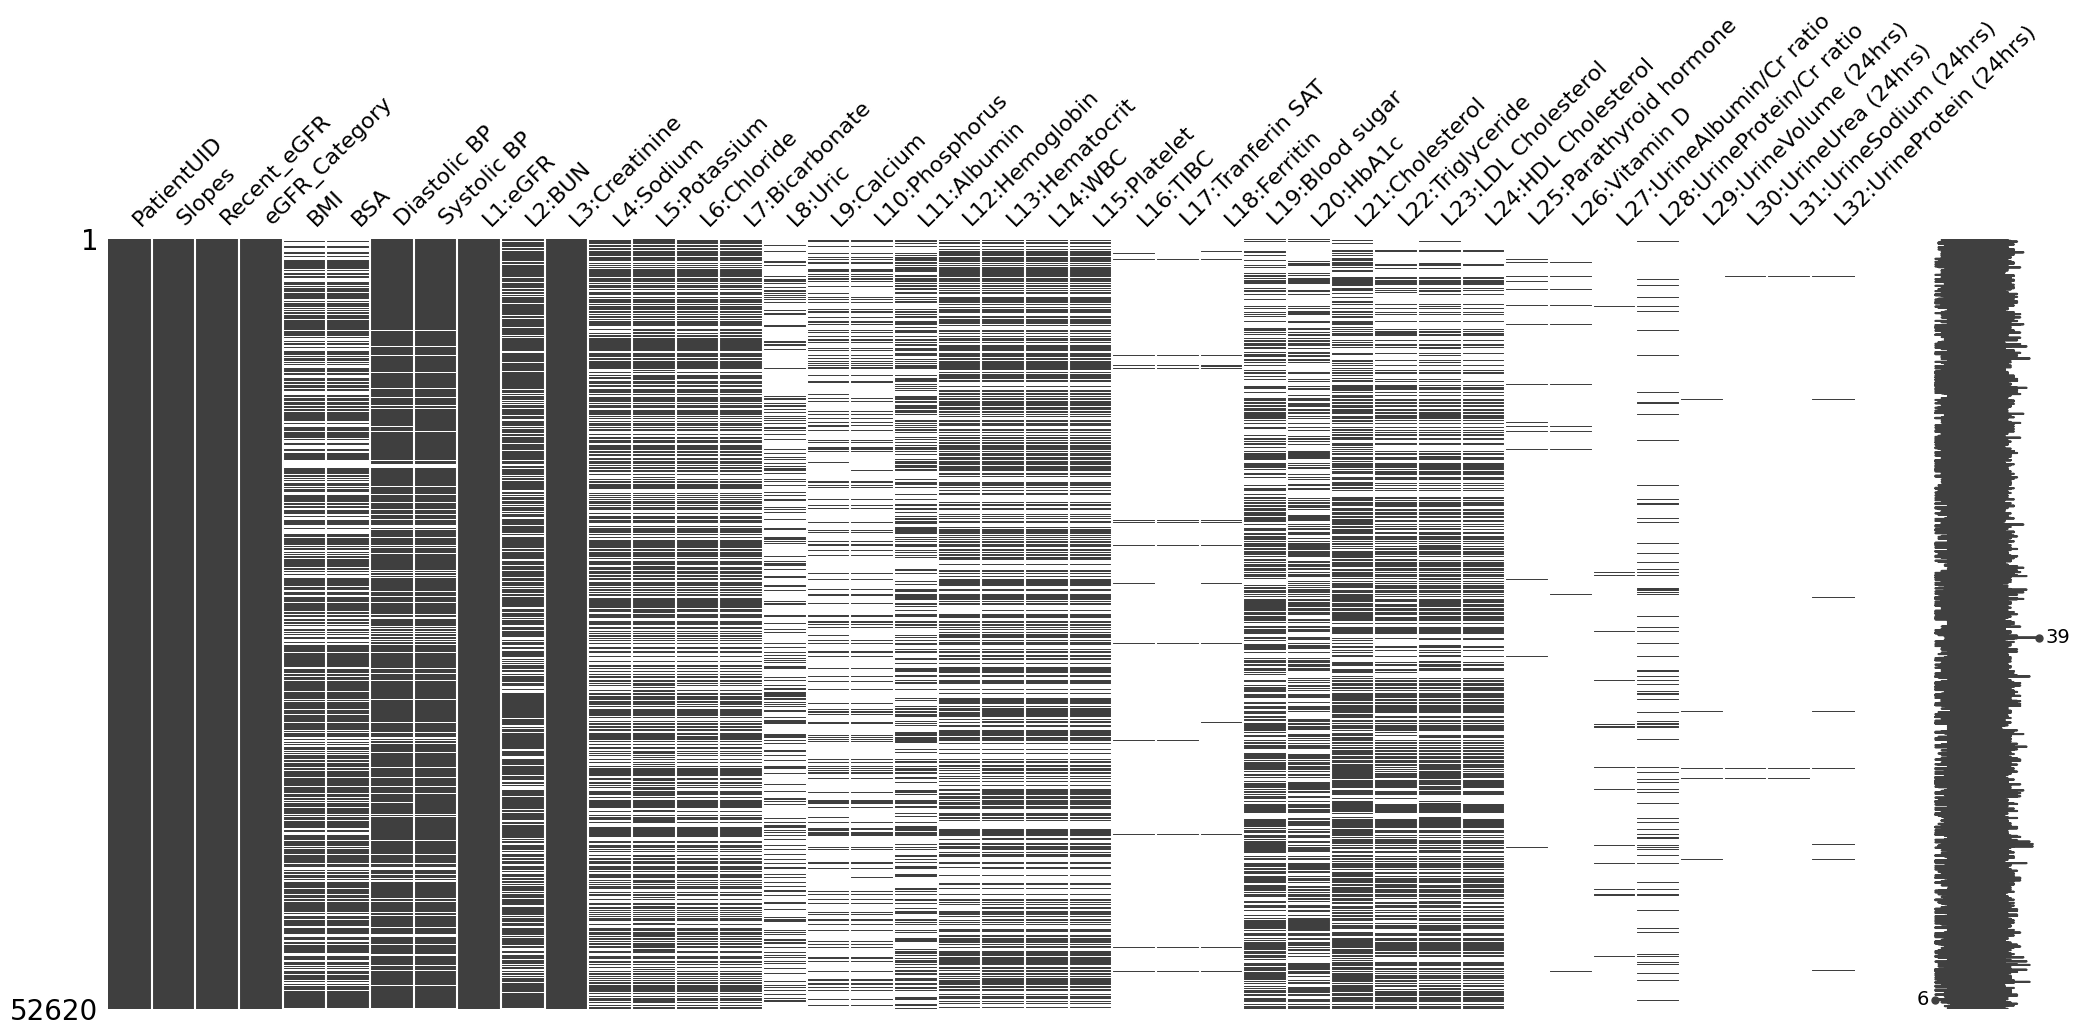

In [ ]:
import missingno as msno
msno.matrix(stage)

In [ ]:
stage_sort.columns

Index(['PatientUID', 'Slopes', 'Recent_eGFR', 'eGFR_Category', 'BMI', 'BSA',
       'Diastolic BP', 'Systolic BP', 'L1:eGFR', 'L2:BUN', 'L3:Creatinine',
       'L4:Sodium', 'L5:Potassium', 'L6:Chloride', 'L7:Bicarbonate', 'L8:Uric',
       'L9:Calcium', 'L10:Phosphorus', 'L11:Albumin', 'L12:Hemoglobin',
       'L13:Hematocrit', 'L14:WBC', 'L15:Platelet', 'L16:TIBC',
       'L17:Tranferin SAT', 'L18:Ferritin', 'L19:Blood sugar', 'L20:HbA1c',
       'L21:Cholesterol', 'L22:Triglyceride', 'L23:LDL Cholesterol',
       'L24:HDL Cholesterol', 'L25:Parathyroid hormone', 'L26:Vitamin D',
       'L27:UrineAlbumin/Cr ratio', 'L28:UrineProtein/Cr ratio',
       'L29:UrineVolume (24hrs)', 'L30:UrineUrea (24hrs)',
       'L31:UrineSodium (24hrs)', 'L32:UrineProtein (24hrs)'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# เลือกคอลัมน์ที่ต้องการ scale
columns_to_scale = ['Recent_eGFR', 'BMI', 'BSA',
                    'Diastolic BP', 'Systolic BP', 'L1:eGFR', 'L2:BUN', 'L3:Creatinine',
                    'L4:Sodium', 'L5:Potassium', 'L6:Chloride', 'L7:Bicarbonate', 'L8:Uric',
                    'L9:Calcium', 'L10:Phosphorus', 'L11:Albumin', 'L12:Hemoglobin',
                    'L13:Hematocrit', 'L14:WBC', 'L15:Platelet', 'L16:TIBC',
                    'L17:Tranferin SAT', 'L18:Ferritin', 'L19:Blood sugar', 'L20:HbA1c',
                    'L21:Cholesterol', 'L22:Triglyceride', 'L23:LDL Cholesterol',
                    'L24:HDL Cholesterol', 'L25:Parathyroid hormone', 'L26:Vitamin D',
                    'L27:UrineAlbumin/Cr ratio', 'L28:UrineProtein/Cr ratio',
                    'L29:UrineVolume (24hrs)', 'L30:UrineUrea (24hrs)',
                    'L31:UrineSodium (24hrs)', 'L32:UrineProtein (24hrs)']

# คัดลอกข้อมูลเฉพาะคอลัมน์ที่เลือก
df_selected_columns = stage_sort[columns_to_scale].copy()

# แปลงข้อมูล
scaler = StandardScaler()
df_selected_columns_scaled = scaler.fit_transform(df_selected_columns)

# สร้าง DataFrame จากข้อมูลที่แปลงแล้ว
df_selected_columns_scaled = pd.DataFrame(df_selected_columns_scaled.round(2), columns=columns_to_scale)

# ต่อ DataFrame ที่ไม่ได้เปลี่ยนแปลงกับ DataFrame ที่เปลี่ยนแปลงแล้ว
stage_result = pd.concat([stage_sort.drop(columns=columns_to_scale), df_selected_columns_scaled], axis=1)
stage_result


,PatientUID,Slopes,eGFR_Category,Recent_eGFR,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
51783,553538,0.058871,Stage 1,-2.49,-0.01,-0.30,-0.01,0.03,-2.23,2.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51784,553538,-51.636256,Stage 1,-2.49,-0.01,-0.23,-0.03,0.03,-1.35,1.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5319,2384626,0.795640,Stage 1,1.08,-0.01,-0.21,-0.00,-0.01,0.27,-0.48,...,0.86,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5318,2384626,7.984375,Stage 1,1.08,NaN,NaN,-0.01,-0.01,0.12,-0.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5317,2384626,79.441176,Stage 1,1.08,-0.01,-0.16,-0.04,-0.05,0.25,NaN,...,0.01,0.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14354,995791,0.197297,Stage 5,0.56,-0.01,0.04,-0.02,-0.01,-0.19,0.00,...,-1.15,-0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14355,995791,-2.553202,Stage 5,0.56,-0.01,-0.15,-0.04,0.00,0.16,NaN,...,-1.05,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14353,995791,-0.494580,Stage 5,0.56,-0.01,-0.13,-0.03,-0.01,1.02,NaN,...,0.95,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14352,995791,-4.615925,Stage 5,0.56,-0.01,-0.16,-0.01,0.01,0.61,-0.31,...,0.43,0.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
stage_result.describe()

,PatientUID,Slopes,Recent_eGFR,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,L3:Creatinine,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
count,5.262000e+04,52620.000000,52620.000000,37281.000000,37271.000000,45778.000000,45819.000000,52619.000000,39780.000000,52619.000000,...,29225.000000,25994.000000,883.000000,1270.000000,1304.000000,5468.000000,340.000000,396.000000,284.000000,511.000000
mean,9.847286e+05,-2.169255,-0.000028,-0.000172,-0.000093,0.000039,0.000272,-0.000012,0.000036,-0.000027,...,-0.000026,0.000265,-0.000034,-0.000024,0.000353,-0.000071,-0.000088,0.000606,0.000141,-0.000078
std,7.852055e+05,9.785498,0.999972,1.000043,1.000018,1.000003,0.999996,1.000002,1.000052,0.999997,...,1.000055,0.999946,1.000726,1.000254,1.000308,1.000165,1.001178,1.001179,1.001857,1.001047
min,2.299000e+03,-79.002653,-2.790000,-0.030000,-1.620000,-0.200000,-0.180000,-3.190000,-1.980000,-1.260000,...,-2.710000,-3.070000,-0.480000,-2.440000,-0.270000,-0.780000,-1.640000,-1.840000,-1.450000,-0.640000
25%,3.048090e+05,-6.381052,-0.540000,-0.010000,-0.130000,-0.030000,-0.020000,-0.580000,-0.590000,-0.380000,...,-0.700000,-0.660000,-0.320000,-0.700000,-0.260000,-0.560000,-0.665000,-0.730000,-0.712500,-0.525000
50%,8.718500e+05,-1.706494,0.130000,-0.010000,-0.010000,-0.010000,-0.010000,0.030000,-0.230000,-0.150000,...,-0.160000,-0.160000,-0.240000,-0.080000,-0.230000,-0.260000,-0.160000,-0.225000,-0.245000,-0.370000
75%,1.388184e+06,2.488436,0.610000,0.000000,0.100000,0.010000,0.000000,0.570000,0.280000,0.080000,...,0.530000,0.540000,-0.060000,0.617500,-0.100000,0.210000,0.582500,0.570000,0.515000,0.015000
max,3.321289e+06,106.892857,5.130000,192.580000,158.880000,212.240000,159.660000,6.230000,19.370000,27.020000,...,14.430000,9.100000,16.940000,4.120000,27.790000,18.020000,5.450000,3.910000,5.480000,6.230000


In [ ]:
stage_result.columns

Index(['PatientUID', 'Slopes', 'eGFR_Category', 'Recent_eGFR', 'BMI', 'BSA',
       'Diastolic BP', 'Systolic BP', 'L1:eGFR', 'L2:BUN', 'L3:Creatinine',
       'L4:Sodium', 'L5:Potassium', 'L6:Chloride', 'L7:Bicarbonate', 'L8:Uric',
       'L9:Calcium', 'L10:Phosphorus', 'L11:Albumin', 'L12:Hemoglobin',
       'L13:Hematocrit', 'L14:WBC', 'L15:Platelet', 'L16:TIBC',
       'L17:Tranferin SAT', 'L18:Ferritin', 'L19:Blood sugar', 'L20:HbA1c',
       'L21:Cholesterol', 'L22:Triglyceride', 'L23:LDL Cholesterol',
       'L24:HDL Cholesterol', 'L25:Parathyroid hormone', 'L26:Vitamin D',
       'L27:UrineAlbumin/Cr ratio', 'L28:UrineProtein/Cr ratio',
       'L29:UrineVolume (24hrs)', 'L30:UrineUrea (24hrs)',
       'L31:UrineSodium (24hrs)', 'L32:UrineProtein (24hrs)'],
      dtype='object')

In [ ]:
# นับค่าว่างและค่าไม่ว่างของแต่ละคอลัมน์
missing_values = stage_result.isnull().sum()
non_missing_values = stage_result.notnull().sum()

# สร้าง DataFrame ของค่าว่างและค่าไม่ว่าง
missing_non_missing_df = pd.DataFrame({'Missing Values': missing_values, 'Non-Missing Values': non_missing_values})
missing_non_missing_df

,Missing Values,Non-Missing Values
PatientUID,0,52620
Slopes,0,52620
eGFR_Category,0,52620
Recent_eGFR,0,52620
BMI,15339,37281
BSA,15349,37271
Diastolic BP,6842,45778
Systolic BP,6801,45819
L1:eGFR,1,52619
L2:BUN,12840,39780


## plot ตามค่า  eGFR_Category

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

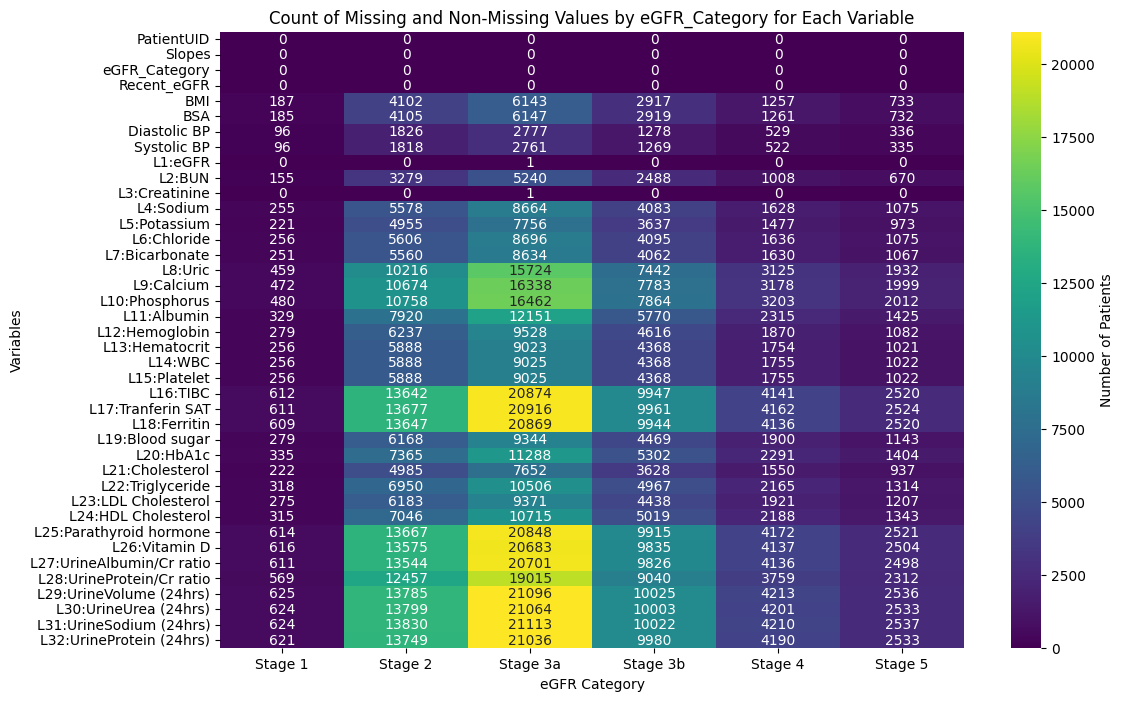

In [ ]:
# Count missing and non-missing values for each column by 'eGFR_Category'
missing_non_missing_count = stage_result.groupby('eGFR_Category').apply(lambda x: x.isnull().sum())

# Transpose the DataFrame for better visualization
missing_non_missing_count = missing_non_missing_count.T

# Plotting the missing and non-missing counts
plt.figure(figsize=(12, 8))
sns.heatmap(missing_non_missing_count, cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Number of Patients'})

plt.title('Count of Missing and Non-Missing Values by eGFR_Category for Each Variable')
plt.xlabel('eGFR Category')
plt.ylabel('Variables')
plt.show()

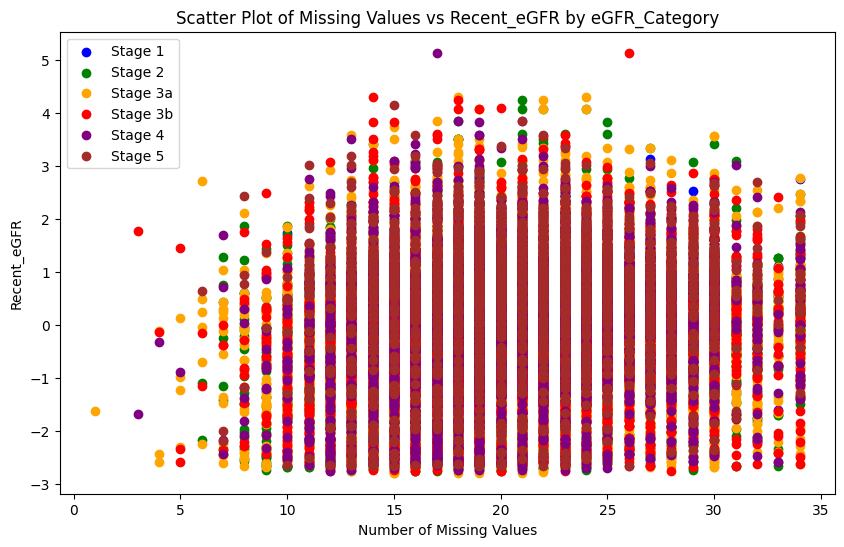

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# สร้าง scatter plot
plt.figure(figsize=(10, 6))

# กำหนดสีของแต่ละระดับ 'eGFR_Category'
colors = {'Stage 1': 'blue', 'Stage 2': 'green', 'Stage 3a': 'orange', 'Stage 3b': 'red', 'Stage 4': 'purple', 'Stage 5': 'brown'}

for category, color in colors.items():
    x = stage_result[stage_result['eGFR_Category'] == category].isnull().sum(axis=1)  # จำนวนค่าว่างของแต่ละแถว
    y = stage_result[stage_result['eGFR_Category'] == category]['Recent_eGFR']
    plt.scatter(x, y, color=color, label=category)

plt.xlabel('Number of Missing Values')
plt.ylabel('Recent_eGFR')
plt.title('Scatter Plot of Missing Values vs Recent_eGFR by eGFR_Category')
plt.legend()
plt.show()

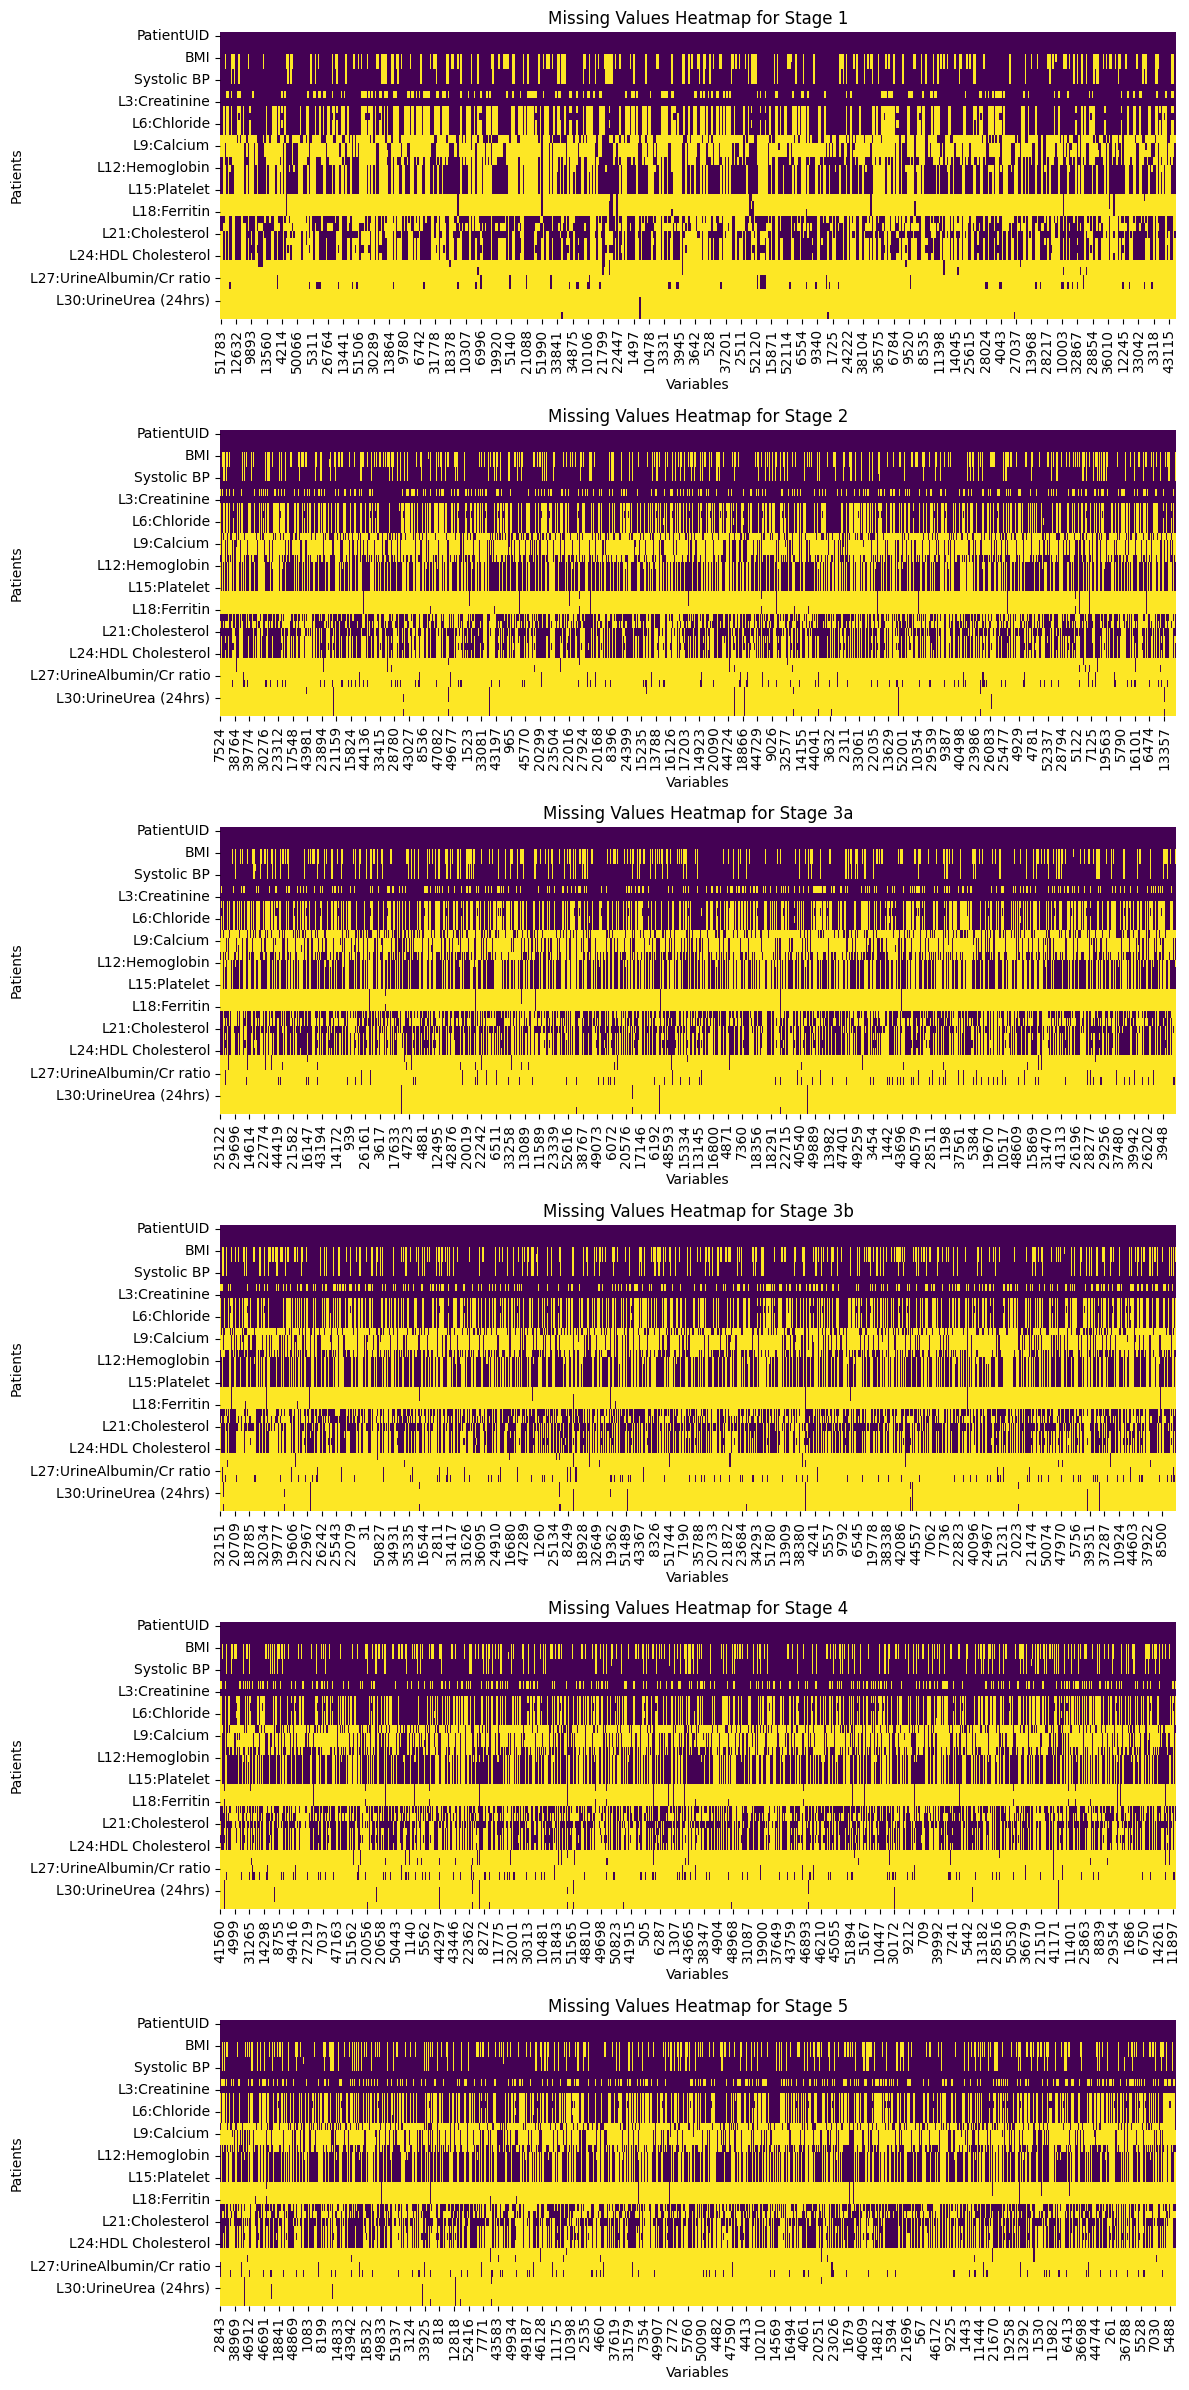

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# สร้าง DataFrame ที่เก็บค่าว่างและค่าไม่ว่างของแต่ละตัวแปร
missing_values = stage_result.isnull().astype(int)

# เพิ่มคอลัมน์ 'eGFR_Category' ใน DataFrame ของค่าว่างและค่าไม่ว่าง
missing_values['eGFR_Category'] = stage_result['eGFR_Category']

# สร้าง subplot แยกตาม 'eGFR_Category' เพื่อแสดง Heatmap แยกแต่ละ stage
unique_categories = missing_values['eGFR_Category'].unique()
num_categories = len(unique_categories)

fig, axes = plt.subplots(num_categories, figsize=(12, num_categories * 4))

for i, category in enumerate(unique_categories):
    data = missing_values[missing_values['eGFR_Category'] == category].drop('eGFR_Category', axis=1).T
    sns.heatmap(data, cmap='viridis', cbar=False, ax=axes[i])
    axes[i].set_xlabel('Variables')
    axes[i].set_ylabel('Patients')
    axes[i].set_title(f'Missing Values Heatmap for {category}')

plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# สร้าง Heatmap โดยใช้ clustermap แยกตาม 'Recent_eGFR by eGFR_Category' และ 'Variables'
sns.set(font_scale=1.1)
plt.figure(figsize=(12, 8))
sns.clustermap(stage_result.drop(['PatientUID', 'Slopes', 'eGFR_Category'], axis=1),
               row_cluster=True, col_cluster=False,
               cmap='viridis', cbar_kws={'label': 'Values'}, yticklabels=1)
plt.title('Clustered Heatmap of Variables by Recent_eGFR by eGFR_Category')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
